In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean,variance
from scipy.stats import norm

In [2]:
fixing_date = "2023-07-26"
time_format = "%Y-%m-%d"
asset_names = ["GOOGL UW Equity", "MSFT UW Equity", "AAPL UW Equity"]
df = pd.read_csv("stock_historical_prices.csv")
df.head(5)

,Dates,GOOGL UW Equity,MSFT UW Equity,AAPL UW Equity
0,2/10/2017,48.374,70.1074,36.494
1,3/10/2017,48.604,69.7785,36.653
2,4/10/2017,48.339,70.1826,36.416
3,5/10/2017,49.260,71.3853,36.869
4,6/10/2017,49.682,71.4135,36.847


In [3]:
from datetime import datetime
def preprocess_date(df):
   df["date"] = pd.to_datetime(df["Dates"], format = "%d/%m/%Y")


def calculate_returns(df, asset_names):
   for asset_name in asset_names:
      calculate_return(df, asset_name)

def calculate_return(df, asset_name: str):
   df[asset_name + "_return"] = np.log(df[asset_name] / df[asset_name].shift(1))


In [6]:
preprocess_date(df)
calculate_returns(df, ["GOOGL UW Equity", "MSFT UW Equity", "AAPL UW Equity"])

In [7]:
df

,Dates,GOOGL UW Equity,MSFT UW Equity,AAPL UW Equity,date,GOOGL UW Equity_return,MSFT UW Equity_return,AAPL UW Equity_return
0,2/10/2017,48.374,70.1074,36.494,2017-10-02,NaN,NaN,NaN
1,3/10/2017,48.604,69.7785,36.653,2017-10-03,0.004743,-0.004702,0.004347
2,4/10/2017,48.339,70.1826,36.416,2017-10-04,-0.005467,0.005774,-0.006487
3,5/10/2017,49.260,71.3853,36.869,2017-10-05,0.018874,0.016992,0.012363
4,6/10/2017,49.682,71.4135,36.847,2017-10-06,0.008530,0.000395,-0.000597
5,9/10/2017,49.616,71.6860,36.976,2017-10-09,-0.001329,0.003809,0.003495
6,10/10/2017,49.390,71.6860,36.990,2017-10-10,-0.004565,0.000000,0.000379
7,11/10/2017,50.283,71.8082,37.144,2017-10-11,0.017919,0.001703,0.004155
8,12/10/2017,50.283,72.4659,37.014,2017-10-12,0.000000,0.009117,-0.003506
9,13/10/2017,50.394,72.8136,37.248,2017-10-13,0.002205,0.004787,0.006302


## Abstract modelling class

In [8]:
from abc import ABC, abstractmethod

class AssetModel(ABC):

    start_date: str
    cur_date: str

    def __init__(self, df: pd.DataFrame, fixing_date: str):
        preprocess_date(df)
        self.start_date = df["date"].min()
        self.end_date = df["date"].max()
        self.df = df.set_index("date")
        self.fixing_date = fixing_date

    
    def set_start_date(self, start_date: str):
        self.start_date = start_date

    def set_cur_date(self, cur_date: str):
        self.cur_date = cur_date
    
    def fit_date(self, start_date: str, cur_date: str):
        data = self.df.loc[start_date:cur_date]
        self.fit_model(data)
    
    @abstractmethod
    def fit_model(self, data: pd.DataFrame):
        return NotImplemented

    @abstractmethod   
    def get_predict_price(self, cur_date: str):
        return NotImplemented

    @abstractmethod
    def get_path(self, cur_date: str):
        return NotImplemented


## SingleAssetGBM

In [185]:
## Assumption: data is on daily frequence
## delta_t = 1
class SingleAssetGBM(AssetModel):

    Nsim:int
    asset_name: str
    r: float
    v: float
    sigma: float

    def __init__(self, df: pd.DataFrame, fixing_date: str, asset_name):
        super().__init__(df, fixing_date)
        self.asset_name = asset_name
        # self.df = self.df[["date", asset_name]]
        calculate_return(self.df, asset_name)


    def fit_model(self, data: pd.DataFrame):
        self.Nsim = 1000
        self.r = data[self.asset_name + "_return"].mean()
        self.sigma = np.sqrt(1 / (len(data) - 1) * np.sum((data[self.asset_name + "_return"] - self.r) ** 2) )
        self.v = self.r-0.5*self.sigma**2
        
    def get_predict_price(self, cur_date: str):
        prices = []
        self.set_cur_date(cur_date)
        self.fit_date(self.start_date, self.cur_date)
        # print(datetime.strptime(self.cur_date, time_format), datetime.strptime(self.fixing_date, time_format))
        days = np.busday_count( self.cur_date, self.fixing_date)
        for i in range(self.Nsim):
            w = np.random.normal(0, 1)
            price = self.df.loc[cur_date, self.asset_name] * np.exp(self.v * days + self.sigma * w)
            prices.append(price)
        return prices
    
    def get_predict_price_av(self, cur_date: str):
        prices = []
        self.set_cur_date(cur_date)
        self.fit_date(self.start_date, self.cur_date)
        # print(datetime.strptime(self.cur_date, time_format), datetime.strptime(self.fixing_date, time_format))
        days = np.busday_count( self.cur_date, self.fixing_date)
        for i in range(self.Nsim):
            w = np.random.normal(0, 1)
            price = self.df.loc[cur_date, self.asset_name] * np.exp(self.v * days + self.sigma * w)
            price_av = self.df.loc[cur_date, self.asset_name] * np.exp(self.v * days + self.sigma * -w)
            prices.append(price)
            prices.append(price_av)
        return prices
    
    def get_predict_price_ss(self, cur_date: str):
        prices = []
        self.set_cur_date(cur_date)
        self.fit_date(self.start_date, self.cur_date)
        # print(datetime.strptime(self.cur_date, time_format), datetime.strptime(self.fixing_date, time_format))
        days = np.busday_count( self.cur_date, self.fixing_date)
        for i in range(self.Nsim):
            u = np.random.uniform(0, 1)
            V = i/1000 + u/1000
            w = norm.ppf(V)
            price = self.df.loc[cur_date, self.asset_name] * np.exp(self.v * days + self.sigma * w)
            prices.append(price)
        return prices

    def get_path(self, cur_date: str):
        paths = []
        self.set_cur_date(cur_date)
        self.fit_date(self.start_date, self.cur_date)
        days = np.busday_count( self.cur_date, self.fixing_date)
        
        for i in range(self.Nsim):
            w = np.random.normal(0, 1, days)
            price_path = pd.Series(np.exp(self.v + self.sigma * w)).cumprod() * self.df.loc[cur_date, self.asset_name]
            paths.append(price_path)
        return paths
    

In [186]:
google = SingleAssetGBM(df, fixing_date, "GOOGL UW Equity")

In [187]:
cur_date = "2022-07-21"
prices = google.get_predict_price(cur_date)
av_prices = google.get_predict_price_av(cur_date)
ss_prices = google.get_predict_price_ss(cur_date)

-3.6398045815833706
-2.9729770992809463
-2.795845390533443
-2.6746994702458173
-2.6503697675535576
-2.575100566911396
-2.465560081498721
-2.441775833854208
-2.3875341798791796
-2.335453359383107
-2.2930130188672173
-2.286174101671511
-2.249805431291692
-2.1979531162728088
-2.179161122022051
-2.1623736386245174
-2.120541005072863
-2.0975822090936886
-2.0856419767506003
-2.0563560830800376
-2.0434804372136757
-2.016785125715009
-1.9978840104888858
-1.9902093572325086
-1.9686732387829498
-1.9590187832149446
-1.9307970640803136
-1.917138992922116
-1.8976181812825952
-1.8867775559635072
-1.8748316315981137
-1.8660372485839822
-1.8495941416889117
-1.8368409669836405
-1.8203217792090038
-1.8020815330629876
-1.792420371641217
-1.774887287021281
-1.7707791746911608
-1.7538791593816558
-1.7482495499844715
-1.7302514718275361
-1.7215140371993536
-1.7131306809294888
-1.6969104538665203
-1.6879612474107375
-1.6756757460449905
-1.6658314838688157
-1.6614734916561327
-1.6542567383929443
-1.6387875213

0.6088148303297403
0.6104097988046265
0.6143518289051745
0.6182169769865944
0.6192784248166976
0.6232717560481912
0.6258680110409118
0.630663100302353
0.6335884481169842
0.6354375150763564
0.639412839080135
0.6424399283827545
0.6458643762494822
0.6472124142320613
0.6498803414441299
0.6547585895834309
0.6587250421292015
0.6595690947434651
0.6628144059873403
0.6653544942941273
0.6713340565958955
0.674227237437673
0.6756720370927236
0.6791286248686159
0.6818553501077514
0.6851599624969297
0.6878846796074818
0.6926362555296864
0.696545364271766
0.6982530513800147
0.7003877161300834
0.7031165263114032
0.7086643884924875
0.7096024990282177
0.7136050193269848
0.7188473189158783
0.7210753316246469
0.723187306942152
0.726427070623851
0.731913446744526
0.7327943197109584
0.7380048297907519
0.7399047288002678
0.7446844146529431
0.7466397537890856
0.7512089891675942
0.7550928542566122
0.7568342074183804
0.7589252535582381
0.7652635553170538
0.7667835057405142
0.7708064131692346
0.7724751839880275


In [188]:
mean(prices)

130.98370283479193

In [189]:
variance(prices)

6.151529754613554

In [190]:
variance(av_prices)

5.798913717258461

In [191]:
variance(ss_prices)

5.8834662064674585

In [37]:
google.r, google.v, google.sigma

(0.0006865235327487367, 0.0005153878485146358, 0.018500577517153397)

In [13]:
(1 + 0.0006865235327487374) ** 1000

1.98632854661763

<AxesSubplot:>

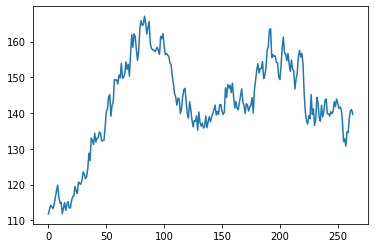

In [185]:
google.get_path(cur_date).plot()

In [33]:
google.get_path(cur_date)

0      115.571628
1      115.215974
2      115.619482
3      113.454310
4      115.880123
5      118.945189
6      121.893665
7      124.100910
8      123.071277
9      120.724964
10     121.576982
11     125.426455
12     122.065954
13     121.319577
14     124.449448
15     127.455071
16     126.509466
17     125.378934
18     124.216486
19     119.593226
20     123.934806
21     124.187578
22     124.520656
23     126.536691
24     127.617299
25     126.688078
26     125.934673
27     125.969703
28     127.505197
29     127.962808
          ...    
234    164.520913
235    167.999114
236    170.055695
237    170.879050
238    167.047058
239    166.212648
240    161.404051
241    161.108047
242    165.441761
243    161.333250
244    161.464111
245    161.627806
246    158.036452
247    158.053992
248    156.193611
249    159.054796
250    159.829877
251    162.071759
252    165.114100
253    168.548470
254    166.492155
255    171.549658
256    168.204169
257    166.596065
258    167

In [39]:
google.get_path(cur_date).mean()

133.5035046873142

## MultiAssetGBM

In [201]:
## Assumption: data is on daily frequence
## delta_t = 1
class  MultiAssetGBM(AssetModel):

    asset_names: list
    r: float
    v: float
    sigma: float

    def __init__(self, df: pd.DataFrame, fixing_date: str, asset_names: list):
        super().__init__(df, fixing_date)
        self.asset_names = asset_names
        calculate_returns(self.df, asset_names)
        self.return_names = [x + "_return" for x in self.asset_names]
        self.no_of_assets = len(self.asset_names)

    def fit_model(self, data: pd.DataFrame):
        returns = data[self.return_names]
        self.r = returns.mean()
        self.sigma = np.sqrt(returns.cov())
        self.v = self.r-np.power(self.sigma,2)/2
        

    def get_predict_price(self, cur_date: str):
        self.set_cur_date(cur_date)
        self.fit_date(self.start_date, self.cur_date)
        # print(datetime.strptime(self.cur_date, time_format), datetime.strptime(self.fixing_date, time_format))
        days = np.busday_count( self.cur_date, self.fixing_date)
        
        w = np.random.normal(0, 1, self.no_of_assets)
        print(w)

        self.s_0 = self.df.loc[cur_date, self.asset_names]

        return self.s_0.values * np.exp(self.v * days + self.sigma.transpose() @ w)
        

    def get_path(self, cur_date: str):
        self.set_cur_date(cur_date)
        self.fit_date(self.start_date, self.cur_date)
        days = np.busday_count( self.cur_date, self.fixing_date)
        
        w = np.random.normal(0, 1, (self.no_of_assets, days))
        self.s_0 = self.df.loc[cur_date, self.asset_names]
        return_path =np.exp(np.repeat([self.v.values], [days], axis = 0).transpose() + self.sigma.transpose().values @  w).cumprod(axis = 1)
        price_path = np.diag(self.s_0) @ return_path
        return price_path

In [202]:
multassetGBM = MultiAssetGBM(df, fixing_date, asset_names)

In [203]:

multassetGBM.get_predict_price(cur_date)

[ 0.00391401 -0.03009236  1.84440265]


GOOGL UW Equity_return    141.117846
MSFT UW Equity_return     360.408166
AAPL UW Equity_return     218.309673
dtype: object

In [209]:
multassetGBM.sigma

,GOOGL UW Equity_return,MSFT UW Equity_return,AAPL UW Equity_return
GOOGL UW Equity_return,0.018508,0.016499,0.016049
MSFT UW Equity_return,0.016499,0.018544,0.016883
AAPL UW Equity_return,0.016049,0.016883,0.020146


<AxesSubplot:xlabel='date'>

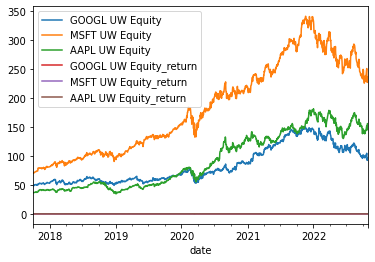

In [210]:
multassetGBM.df.plot()

<AxesSubplot:>

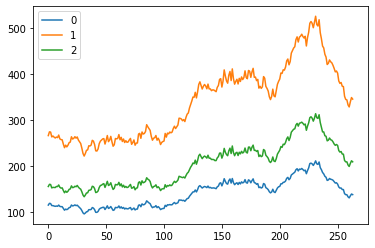

In [208]:
pd.DataFrame(multassetGBM.get_path(cur_date)).transpose().plot()

In [200]:
np.diag(multassetGBM.s_0)

array([[114.34, 0, 0],
       [0, 264.2791, 0],
       [0, 0, 155.135]], dtype=object)

In [193]:
w = np.random.normal(0, 1, (multassetGBM.no_of_assets,250))
multassetGBM.s_0 = multassetGBM.df.loc[cur_date, multassetGBM.asset_names]
return_path = np.exp(np.repeat([multassetGBM.v.values], [250], axis = 0).transpose() + multassetGBM.sigma.transpose().values @  w).cumprod(axis = 1)

In [194]:
return_path.shape

(3, 250)

In [191]:
.shape

(250, 3)